# DEMO 4.2: **Hierarchical Agglomerative Clustering (HAC)**
<u>Nội dung</u>:
1. Dendrogram
2. Agglomerative Clustering

<u>Cập nhật</u>: **04/2023**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch04 - Unsupervised Learning'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

from collections          import Counter
from scipy.cluster        import hierarchy
from sklearn.cluster      import AgglomerativeClustering

---
## 1. **Dendrogram**
---

In [ ]:
## Tập tin dữ liệu Shopping.csv
data = pd.read_csv(folder + '/Data/Shopping.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [ ]:
## Quan sát sơ bộ dữ liệu
print('Kích thước các clusters:', Counter(data.Genre))

Kích thước các clusters: Counter({'Female': 112, 'Male': 88})


In [ ]:
## Chuyển thuộc tính [Genre] sang dạng số
data = pd.get_dummies(data, drop_first = True) # thuộc tính nhị phân nên có thể bỏ 1 cột
print(data.head())

   CustomerID  Age  Annual Income  Spending Score  Genre_Male
0           1   19             15              39           1
1           2   21             15              81           1
2           3   20             16               6           0
3           4   23             16              77           0
4           5   31             17              40           0


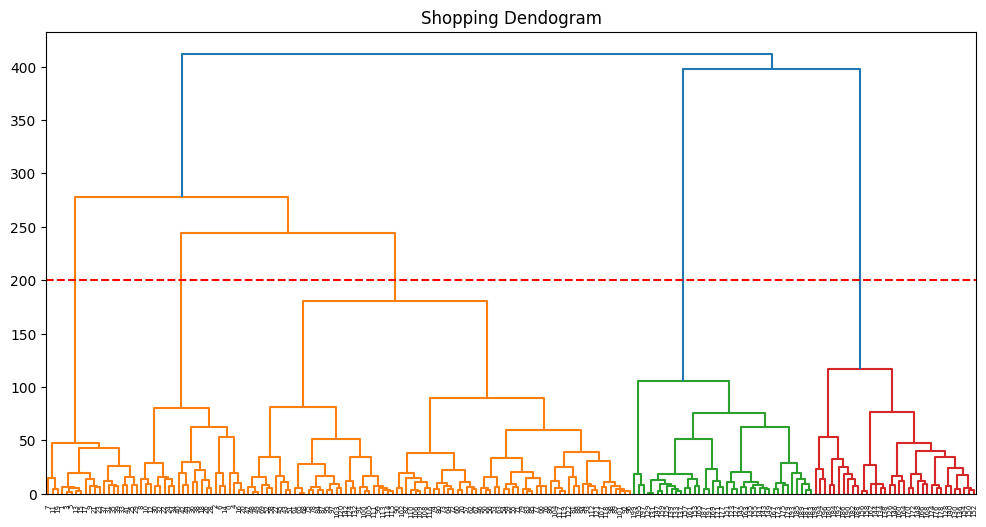

In [ ]:
##------------------------------------------------------------------------------
## Xây dụng Dendrogram
##------------------------------------------------------------------------------
plt.figure(figsize = (12, 6))
plt.title("Shopping Dendogram")
dg = hierarchy.dendrogram(hierarchy.linkage(data[['Age', 'Annual Income', 'Spending Score', 'Genre_Male']],
                                            method = 'ward'))
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
## method = {'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'}

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
## metric = {}

plt.axhline(y = 200, color = 'r', linestyle = '--')
plt.show()

In [ ]:
## Lưu trữ mô hình để khai thác về sau
jlb.dump(dg, folder + '/Output/Dendrogram.mdl')

['/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch04 - Unsupervised Learning/Output/Dendrogram.mdl']

In [ ]:
## Khai thác mô hình đã được xây dựng
model = jlb.load(folder + '/Output/Dendrogram.mdl')

---
## 2. **Agglomerative Clustering**
---

In [ ]:
## Tập tin dữ liệu Shopping.csv
data = pd.read_csv(folder + '/Data/Shopping.csv')
data = pd.get_dummies(data, drop_first = True)

print(data.head())

   CustomerID  Age  Annual Income  Spending Score  Genre_Male
0           1   19             15              39           1
1           2   21             15              81           1
2           3   20             16               6           0
3           4   23             16              77           0
4           5   31             17              40           0


In [ ]:
## Xây dựng mô hình kMeans
k     = 4
model = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
model.fit(data[['Age', 'Annual Income', 'Spending Score', 'Genre_Male']])

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [ ]:
## Kết quả gom cụm khách hàng (AgglomerativeClustering() không có trọng tâm 'cluster_centers_')
data['cluster'] = model.labels_
print(data.head(10))

   CustomerID  Age  Annual Income  Spending Score  Genre_Male  cluster
0           1   19             15              39           1        0
1           2   21             15              81           1        3
2           3   20             16               6           0        0
3           4   23             16              77           0        3
4           5   31             17              40           0        0
5           6   22             17              76           0        3
6           7   35             18               6           0        0
7           8   23             18              94           0        3
8           9   64             19               3           1        0
9          10   30             19              72           0        3


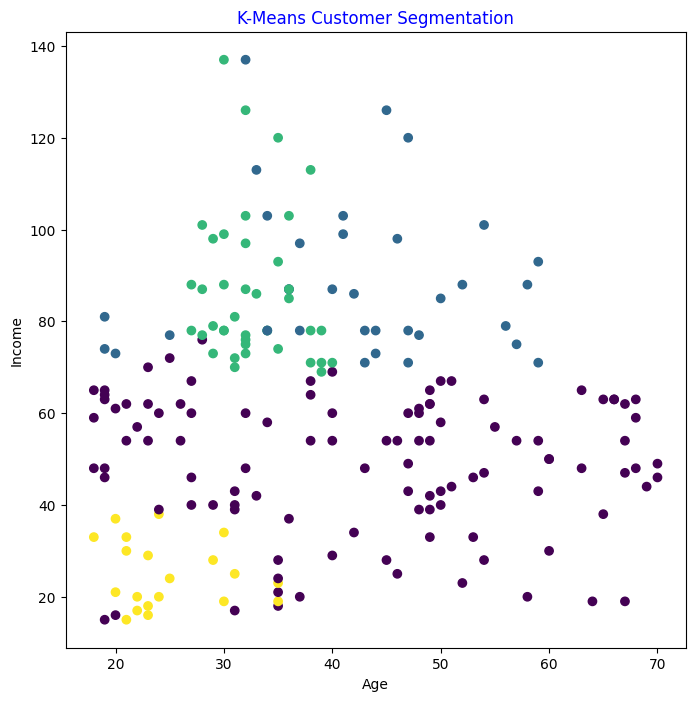

In [ ]:
## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
plt.scatter(data.Age, data['Annual Income'], c = data.cluster)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("K-Means Customer Segmentation", color = "blue")
plt.show()